In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# from google.colab import files
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, make_scorer,precision_recall_fscore_support, roc_curve, plot_roc_curve
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

In [81]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [82]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv')
df = pd.read_csv('ccv/risk_factors_cervical_cancer.csv')

In [83]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df = df.replace('?', np.nan)

In [85]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [86]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [87]:
df = df.astype('float64')
df.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [88]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(df['Smokes'].median())
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(df['IUD'].median())
df['IUD (years)'] = df['IUD (years)'].fillna(df['IUD (years)'].median())
df['STDs'] = df['STDs'].fillna(df['STDs'].median())
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [89]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx'])

In [91]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Hinselmann                            0


In [92]:
df_target = df.loc[(df['Hinselmann'] == 1.0) | (df['Citology'] == 1.0) | (df['Schiller'] == 1.0) | (df['Biopsy'] == 1.0)]
df_not_target = df.loc[(df['Hinselmann'] != 1.0) & (df['Citology'] != 1.0) & (df['Schiller'] != 1.0) & (df['Biopsy'] != 1.0)]

In [93]:
target_upsampled = resample(df_target,
                          replace=True, # sample with replacement
                          n_samples=len(df_not_target), # match number in majority class
                          random_state=0)
df_new =  pd.concat([df_not_target, target_upsampled])

In [94]:
df_train, df_test = train_test_split(df_new, test_size=0.1, random_state=0)

In [95]:
df_train_feature = df_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0',
       'Dx:CIN_0.0', 'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0', 'Dx_1.0']]

train_label = np.array(df_train[['Hinselmann', 'Citology','Schiller','Biopsy']])

df_test_feature = df_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0',
       'Dx:CIN_0.0', 'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0', 'Dx_1.0']]
       
test_label = np.array(df_test[['Hinselmann', 'Citology','Schiller','Biopsy']])

In [96]:
scaler = MinMaxScaler()

df_train_feature = scaler.fit_transform(df_train_feature)
df_test_feature = scaler.transform(df_test_feature)

In [97]:
labels = ['Hinselmann', 'Citology','Schiller','Biopsy']
acc = []
pre = []
rec = []
f =  []
for i in range(4):
  NBClassifer = MultinomialNB(fit_prior = False)
  SVClassifer = SVC()
  LogClassifier = LogisticRegression()
  DTClassifier = DecisionTreeClassifier()
  KNNClassifier = KNeighborsClassifier(n_neighbors = 10)
  Ensemble=StackingClassifier(estimators=[('svc',SVClassifer),('lr',LogClassifier),
                                         ('knn',KNNClassifier),('nb',NBClassifer),
                                         ('dt',DTClassifier)],cv=2)

  Ensemble.fit(df_train_feature, train_label[:,i])
  Ensemble_pred = Ensemble.predict(df_test_feature)

  acc.append(accuracy_score(test_label[:,i], Ensemble_pred))
  pre1, rec1, f1, sup = precision_recall_fscore_support(test_label[:,i], Ensemble_pred, average = 'binary', labels = [0, 1])
  pre.append(pre1)
  rec.append(rec1)
  f.append(f1)
  print(labels[i])
  print("A :", acc[-1])
  print("P :", pre[-1])
  print("R :", rec[-1])
  print("F :", f[-1])

Hinselmann
A : 0.9736842105263158
P : 0.84
R : 1.0
F : 0.9130434782608696
Citology
A : 0.9671052631578947
P : 0.8888888888888888
R : 0.9696969696969697
F : 0.927536231884058
Schiller
A : 0.9736842105263158
P : 0.9285714285714286
R : 1.0
F : 0.962962962962963
Biopsy
A : 0.9736842105263158
P : 0.9090909090909091
R : 1.0
F : 0.9523809523809523


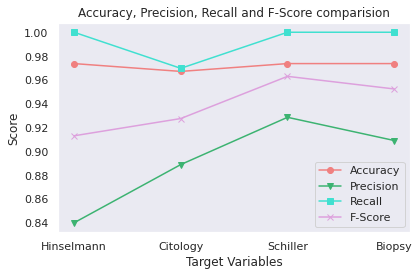

In [98]:
plt.plot(labels, acc, color = 'lightcoral',marker='o',label = 'Accuracy')
plt.plot(labels, pre, color = 'mediumseagreen',marker='v',label = 'Precision')
plt.plot(labels, rec, color = 'turquoise',marker='s',label = 'Recall')
plt.plot(labels, f,   color = 'plum',marker='x',label = 'F-Score')

plt.xlabel("Target Variables")
plt.ylabel("Score")
plt.title("Accuracy, Precision, Recall and F-Score comparision")

plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig("Ensemble-mpl.png", format='svg', dpi = 300)
# files.download("Ensemble-mpl.png") 

plt.show()

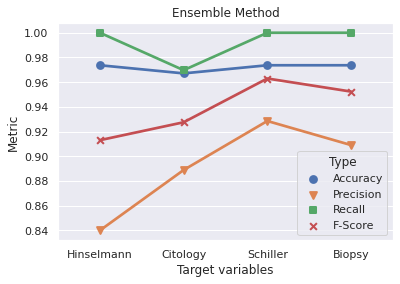

In [99]:
sns.set(style="darkgrid")
dat=pd.DataFrame({'Target variables':labels*4,'Metric':acc+pre+rec+f,'Type':["Accuracy"]*4+["Precision"]*4+["Recall"]*4+["F-Score"]*4})
sns_plot = sns.pointplot(x="Target variables", y="Metric", hue="Type", markers=["o", "v", "s", "x"], data=dat)
plt.title("Ensemble Method")
plt.savefig("Ensemble-mpl.png", format='png', dpi = 300)
# files.download("Ensemble-mpl.png") 
plt.show()

In [100]:
## MULTILABEL
accuracy_ml = []
models_used = ["Naive Bayes", "SVM", "Logistic Regression", "KNN",  "Decision Tree"]

In [101]:
NBClassifer = MultiOutputClassifier(MultinomialNB())
NBClassifer.fit(df_train_feature, train_label)
NB_y_pred = NBClassifer.predict(df_test_feature)
print("Testing accuracy :", NBClassifer.score(df_test_feature, test_label))
accuracy_ml.append(NBClassifer.score(df_test_feature, test_label))
print(classification_report(test_label, NB_y_pred))

Testing accuracy : 0.5197368421052632
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        21
           1       0.50      0.15      0.23        33
           2       0.70      0.37      0.48        52
           3       0.58      0.35      0.44        40

   micro avg       0.55      0.28      0.37       146
   macro avg       0.50      0.25      0.33       146
weighted avg       0.55      0.28      0.37       146
 samples avg       0.11      0.13      0.11       146



In [102]:
SVClassifer = MultiOutputClassifier(SVC(C = 2000, kernel = 'rbf'))
SVClassifer.fit(df_train_feature, train_label)
SVC_y_pred = SVClassifer.predict(df_test_feature)
print("Testing accuracy :", SVClassifer.score(df_test_feature, test_label))
accuracy_ml.append(SVClassifer.score(df_test_feature, test_label))
print(classification_report(test_label, SVC_y_pred))

Testing accuracy : 0.7368421052631579
              precision    recall  f1-score   support

           0       0.92      0.52      0.67        21
           1       0.75      0.55      0.63        33
           2       0.81      0.73      0.77        52
           3       0.82      0.70      0.76        40

   micro avg       0.81      0.65      0.72       146
   macro avg       0.82      0.63      0.71       146
weighted avg       0.81      0.65      0.72       146
 samples avg       0.33      0.32      0.32       146



In [103]:
LogClassifier = MultiOutputClassifier(LogisticRegression(C=1, solver='newton-cg'))
LogClassifier.fit(df_train_feature, train_label)
Log_y_pred = LogClassifier.predict(df_test_feature)
print("Testing accuracy :", LogClassifier.score(df_test_feature, test_label))
accuracy_ml.append(LogClassifier.score(df_test_feature, test_label))
print(classification_report(test_label, Log_y_pred))

Testing accuracy : 0.5131578947368421
              precision    recall  f1-score   support

           0       0.67      0.10      0.17        21
           1       0.83      0.15      0.26        33
           2       0.72      0.44      0.55        52
           3       0.65      0.33      0.43        40

   micro avg       0.70      0.29      0.42       146
   macro avg       0.72      0.25      0.35       146
weighted avg       0.72      0.29      0.40       146
 samples avg       0.17      0.13      0.14       146



In [104]:
KNNClassifier = MultiOutputClassifier(KNeighborsClassifier(weights='distance'))
KNNClassifier.fit(df_train_feature, train_label)
KNN_y_pred = KNNClassifier.predict(df_test_feature)
print("Testing accuracy :", KNNClassifier.score(df_test_feature, test_label))
accuracy_ml.append(KNNClassifier.score(df_test_feature, test_label))
print(classification_report(test_label, KNN_y_pred))

Testing accuracy : 0.875
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.77      1.00      0.87        33
           2       0.81      1.00      0.90        52
           3       0.80      1.00      0.89        40

   micro avg       0.81      1.00      0.89       146
   macro avg       0.81      1.00      0.90       146
weighted avg       0.81      1.00      0.89       146
 samples avg       0.49      0.49      0.49       146



In [105]:
DTClassifier = MultiOutputClassifier(DecisionTreeClassifier(class_weight='balanced',random_state=42))
DTClassifier.fit(df_train_feature, train_label)
DT_pred = DTClassifier.predict(df_test_feature)
print("Testing accuracy :", DTClassifier.score(df_test_feature, test_label))
accuracy_ml.append(DTClassifier.score(df_test_feature, test_label))
print(classification_report(test_label, DT_pred))

Testing accuracy : 0.9078947368421053
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.97      1.00      0.99        33
           2       0.93      1.00      0.96        52
           3       0.85      1.00      0.92        40

   micro avg       0.91      1.00      0.95       146
   macro avg       0.91      1.00      0.95       146
weighted avg       0.91      1.00      0.95       146
 samples avg       0.49      0.49      0.49       146



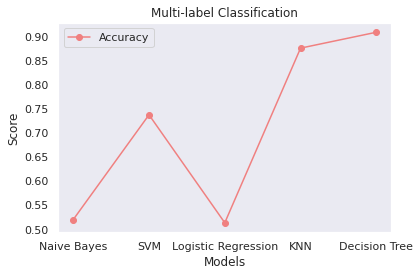

In [106]:
plt.plot(models_used, accuracy_ml, color = 'lightcoral',marker='o',label = 'Accuracy')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Multi-label Classification")

plt.legend()
plt.grid()
plt.tight_layout()

plt.show()


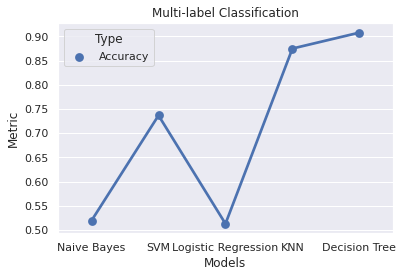

In [107]:
sns.set(style="darkgrid")
dat=pd.DataFrame({'Models':models_used,'Metric':accuracy_ml,'Type':["Accuracy"]*5})
sns.pointplot(x="Models", y="Metric", hue="Type", markers=["o"], data=dat)
plt.title("Multi-label Classification")
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("multi-mpl.png", format='png', dpi = 300, bbox_inches = "tight")
# files.download("multi-mpl.png") 

plt.show()

In [108]:
accuracy_ml

[0.5197368421052632,
 0.7368421052631579,
 0.5131578947368421,
 0.875,
 0.9078947368421053]

In [109]:
# clf.fit(X_train, y_train[:,0])
# label_0= plot_roc_curve(clf, X_test, y_test[:,0], name= 'label 0',)  
# plt.show() 

In [119]:
df_test_feature[:,0].reshape(1, -1).size

152

In [117]:
test_label[:,0].size

152

In [121]:
# # plot_roc_curve(clf, X_test, y_test) 
# label_0 = plot_roc_curve(NBClassifer, df_test_feature[:,0], test_label[:,0], name = 'label 0')
# plt.show()   

In [ ]:
# Reshape your data either using array.reshape(-1, 1) 
# if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# 
# fpr, tpr, thresholds = roc_curve(df_test_feature, NB_y_pred, pos_label=1)
# # roc_auc_score
# # 
# test_auc = auc(fpr, tpr)

In [ ]:
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential
# from tensorflow.python.keras.layers import Dropout

# ann_acc = []
# ann_loss = []

# for i in range(4):
#   model = Sequential() 

#   #Input layer
#   model.add(Dense(units=500, input_dim=40, kernel_initializer='uniform', activation='relu'))
#   model.add(Dropout(0.5))

#   #Hidden layer 1
#   model.add(Dense(units=500, kernel_initializer='uniform', activation='relu'))
#   model.add(Dropout(0.5))

#   #Hidden layer 2
#   model.add(Dense(units=500, kernel_initializer='uniform', activation='relu'))
#   model.add(Dropout(0.5))

#   #Hidden layer 3
#   model.add(Dense(units=500, kernel_initializer='uniform', activation='relu'))
#   model.add(Dropout(0.5))

#   #Output layer
#   model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
#   model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#   train_history = model.fit(x=df_train_feature, y=train_label[:,i], validation_split=0.2, epochs=60, batch_size=200, verbose=0) 

#   ans = model.evaluate(df_test_feature, test_label[:,i])
#   ann_acc.append(ans[1])
#   ann_loss.append(ans[0])
#   print(labels[i])
#   print("A :", ann_acc[-1])
#   print("L :", ann_loss[-1])

In [ ]:
# plt.plot(labels, ann_acc, color = 'mediumseagreen',marker='o',label = 'Accuracy')
# plt.plot(labels, ann_loss, color = 'lightcoral',marker='s',label = 'Loss')

# plt.xlabel("Target Variables")
# plt.ylabel("Score")
# plt.title("Metrics of Neural Network")

# plt.legend()
# plt.grid()
# plt.tight_layout()

# plt.savefig("ann-mpl.svg", format='svg', dpi = 300)
# files.download("ann-mpl.svg") 

# plt.show()

In [ ]:
# sns.set(style="darkgrid")
# dat=pd.DataFrame({'Target variables':labels*2,'Metric':ann_acc+ann_loss,'Type':["Accuracy"]*4+["Loss"]*4})
# sns.pointplot(x="Target variables", y="Metric", hue="Type", markers=["o", "v"], data=dat)
# plt.title("Neural Network")


# plt.savefig("ann-mpl.png", format='png', dpi = 300)
# files.download("ann-mpl.png") 

# plt.show()